In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

import os # accessing directory structure
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     



In [6]:
df=pd.read_csv('C:/Users/azegl/_ZHAWaufC/HSLU/creditcard.csv')

In [7]:
df.to_pickle('C:/Users/azegl/_ZHAWaufC/HSLU/creditcard.pkl')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking again if any NaN values are in the columns
total_nan_count = df.isna().sum()
total_nan_count

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

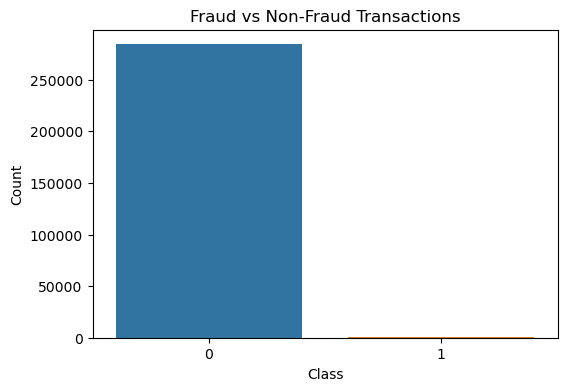

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', hue='Class', legend=False)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
X = df.drop(columns=["Class"])
y = df["Class"]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [14]:
# Train the model
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_array, columns = X.columns)
scaled_X.shape

(284807, 30)

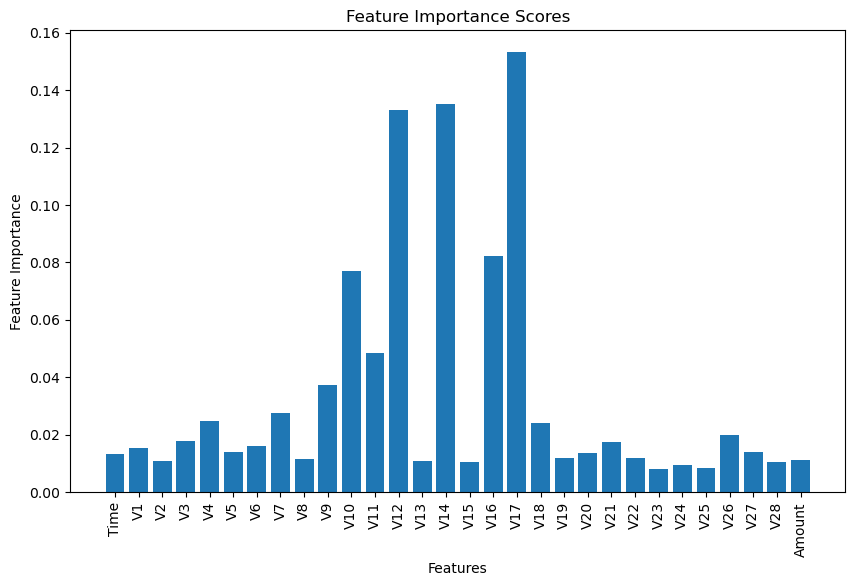

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(scaled_X, y)
feature_importances = model.feature_importances_

# Plot a bar chart of feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

In [16]:
# Select the number of features that to retain from the result of the Feature Importance Score.
top_feature_num = 6
     
from sklearn.feature_selection import SelectFromModel

# Sort feature importances in descending order
sorted_feature_importances = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)

# Get the top feature indices
selected_indices = [index for index, _ in sorted_feature_importances[:top_feature_num]]

# Apply the threshold for feature selection
selector = SelectFromModel(model, threshold=-float('inf'), max_features=top_feature_num)  # Use -inf to select top features
selected_features = selector.fit_transform(scaled_X, y)

#
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = scaled_X.columns[selected_feature_indices]

selected_feature_names
     
selected_features = selected_feature_names.tolist()
selected_features

['V10', 'V11', 'V12', 'V14', 'V16', 'V17']

In [17]:
Keep=selected_features+['Class']
df=df.filter(Keep)

df.head()

,V10,V11,V12,V14,V16,V17,Class
0,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [18]:
df.shape

(284807, 7)

In [19]:
df.to_csv('C:/Users/azegl/_ZHAWaufC/HSLU/prepared_creditcard.csv', index=False)

In [20]:
df.to_pickle('C:/Users/azegl/_ZHAWaufC/HSLU/prepared_creditcard.pkl')